# MSDS 7337 - Natural Language Processing

## Homework 4

### by Evangelos GIakoumakis

Imports

In [25]:
import nltk
from nltk.corpus import brown
import matplotlib.pyplot as plt

In [24]:
print ("System information:")
import platform; 
print(platform.platform())
import sys
print("Python", sys.version)

System information:
Windows-10-10.0.17134
('Python', '2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]')


Sentences selected for tagging

In [2]:
long_sentence = "We cross our bridges as we come to them and burn them behind us, with nothing to show for our progress except a memory of the smell of smoke, and the presumption that once our eyes watered."
short_sentence = "He is very nice; Is he very nice?"
sentence = "He is more myself than I am."

1.	Run one of the part-of-speech (POS) taggers available in Python. 

In [3]:
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
tagged

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('more', 'RBR'),
 ('myself', 'PRP'),
 ('than', 'IN'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('.', '.')]

a.	Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.

Custom POS Tagging function that allows us to use 4 different tagging methods 
(0 - NLTK pos.tagging
 1 - Unigram tagging
 2 - Bigram tagging
 3 - Trigram tagging)

In [4]:
def my_tagger(input, type):
    if input == "":
        print "Empty text input!"
    else:
        if type == 0:
            tokens = nltk.word_tokenize(input)
            tagged = nltk.pos_tag(tokens)
            tag_eval = 0
        elif type == 1:
            train_sents = brown.tagged_sents()
            unigram_tagger = nltk.UnigramTagger(train_sents)
            tokens = nltk.word_tokenize(input)
            tagged = unigram_tagger.tag(tokens)
            tag_eval = (unigram_tagger.evaluate([tagged]) * 100)
        elif type == 2:
            train_sents = brown.tagged_sents()
            bigram_tagger = nltk.BigramTagger(train_sents)
            tokens = nltk.word_tokenize(input)
            tagged = bigram_tagger.tag(tokens)
            tag_eval = (bigram_tagger.evaluate([tagged]) * 100)
        elif type == 3:
            train_sents = brown.tagged_sents()
            trigram_tagger = nltk.TrigramTagger(train_sents)
            tokens = nltk.word_tokenize(input)
            tagged = trigram_tagger.tag(tokens)
            tag_eval = (trigram_tagger.evaluate([tagged]) * 100)
        else:
            print "No POS Tagger type passed!"
        return tagged, tag_eval   

In [5]:
print long_sentence
long_tag_1, long_tag_ev_1 = my_tagger(long_sentence, 0)
long_tag_1

We cross our bridges as we come to them and burn them behind us, with nothing to show for our progress except a memory of the smell of smoke, and the presumption that once our eyes watered.


[('We', 'PRP'),
 ('cross', 'VBP'),
 ('our', 'PRP$'),
 ('bridges', 'NNS'),
 ('as', 'IN'),
 ('we', 'PRP'),
 ('come', 'VBP'),
 ('to', 'TO'),
 ('them', 'PRP'),
 ('and', 'CC'),
 ('burn', 'VB'),
 ('them', 'PRP'),
 ('behind', 'IN'),
 ('us', 'PRP'),
 (',', ','),
 ('with', 'IN'),
 ('nothing', 'NN'),
 ('to', 'TO'),
 ('show', 'VB'),
 ('for', 'IN'),
 ('our', 'PRP$'),
 ('progress', 'NN'),
 ('except', 'IN'),
 ('a', 'DT'),
 ('memory', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('smell', 'NN'),
 ('of', 'IN'),
 ('smoke', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('presumption', 'NN'),
 ('that', 'WDT'),
 ('once', 'RB'),
 ('our', 'PRP$'),
 ('eyes', 'NNS'),
 ('watered', 'VBN'),
 ('.', '.')]

b.	Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.

In [6]:
print short_sentence
shrt_tag_1, shrt_tag_ev_1 = my_tagger(short_sentence, 0)
print "Correctly tagged 87,5% of words"
shrt_tag_1

He is very nice; Is he very nice?
Correctly tagged 87,5% of words


[('He', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('nice', 'JJ'),
 (';', ':'),
 ('Is', 'VBZ'),
 ('he', 'PRP'),
 ('very', 'RB'),
 ('nice', 'RB'),
 ('?', '.')]

2.	Run a different POS tagger in Python. Process the same two sentences from question 1.

In [7]:
long_tag_2, long_tag_ev_2 = my_tagger(long_sentence, 1)
long_tag_2

[('We', u'PPSS'),
 ('cross', u'VB'),
 ('our', u'PP$'),
 ('bridges', u'NNS'),
 ('as', u'CS'),
 ('we', u'PPSS'),
 ('come', u'VB'),
 ('to', u'TO'),
 ('them', u'PPO'),
 ('and', u'CC'),
 ('burn', u'VB'),
 ('them', u'PPO'),
 ('behind', u'IN'),
 ('us', u'PPO'),
 (',', u','),
 ('with', u'IN'),
 ('nothing', u'PN'),
 ('to', u'TO'),
 ('show', u'VB'),
 ('for', u'IN'),
 ('our', u'PP$'),
 ('progress', u'NN'),
 ('except', u'IN'),
 ('a', u'AT'),
 ('memory', u'NN'),
 ('of', u'IN'),
 ('the', u'AT'),
 ('smell', u'NN'),
 ('of', u'IN'),
 ('smoke', u'NN'),
 (',', u','),
 ('and', u'CC'),
 ('the', u'AT'),
 ('presumption', u'NN'),
 ('that', u'CS'),
 ('once', u'RB'),
 ('our', u'PP$'),
 ('eyes', u'NNS'),
 ('watered', u'VBD'),
 ('.', u'.')]

In [8]:
reg_tag, reg_tag_ev = my_tagger(sentence, 1)
reg_tag

[('He', u'PPS'),
 ('is', u'BEZ'),
 ('more', u'QL'),
 ('myself', u'PPL'),
 ('than', u'CS'),
 ('I', u'PPSS'),
 ('am', u'BEM'),
 ('.', u'.')]

a.	Does it produce the same or different output?

The 2 taggers produced an entirely different output:

NLTK pos.tag:
[('He', 'PRP'),
 ('is', 'VBZ'),
 ('more', 'RBR'),
 ('myself', 'PRP'),
 ('than', 'IN'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('.', '.')]
 
 NLTK UnigramTagger:
 [('He', u'PPS'),
 ('is', u'BEZ'),
 ('more', u'QL'),
 ('myself', u'PPL'),
 ('than', u'CS'),
 ('I', u'PPSS'),
 ('am', u'BEM'),
 ('.', u'.')]

In [9]:
matched = set(tagged) & set(reg_tag)
print "Percentage matched: 12,5%"
matched

Percentage matched: 12,5%


{('.', u'.')}

b.	Explain any differences as best you can.

Given that these 2 taggers used different datasets for training as well as having a different categorical tag output, it is only natural that their respective results would not allign 100% with each other.

3.	In a news article from this week’s news, find a random sentence of at least 10 words.

In [10]:
news = "Trapped by Hurricane Michael, some residents summoned aid by spelling out 'HELP' with logs"

a.	Looking at the Penn tag set, manually POS tag the sentence yourself.

In [13]:
print "Manual POS Tagging"
manual_news = [('Trapped', 'VBD'),
 ('by', 'IN'),
 ('Hurricane', 'NN'),
 ('Michael', 'NNP'),
 (',', ','),
 ('some', 'DT'),
 ('residents', 'NNS'),
 ('summoned', 'VBD'),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('spelling', 'VBG'),
 ('out', 'RP'),
 ("'HELP", 'NN'),
 ("'", 'None'),
 ('with', 'IN'),
 ('logs', 'NNS')]

manual_news

Manual POS Tagging


[('Trapped', 'VBD'),
 ('by', 'IN'),
 ('Hurricane', 'NN'),
 ('Michael', 'NNP'),
 (',', ','),
 ('some', 'DT'),
 ('residents', 'NNS'),
 ('summoned', 'VBD'),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('spelling', 'VBG'),
 ('out', 'RP'),
 ("'HELP", 'NN'),
 ("'", 'None'),
 ('with', 'IN'),
 ('logs', 'NNS')]

b.	Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?

In [11]:
print "Using the NLTK pos.tag"
news_tag_1, news_tag_ev_1 = my_tagger(news, 0)
news_tag_1

Using the NLTK pos.tag


[('Trapped', 'VBN'),
 ('by', 'IN'),
 ('Hurricane', 'NNP'),
 ('Michael', 'NNP'),
 (',', ','),
 ('some', 'DT'),
 ('residents', 'NNS'),
 ('summoned', 'VBN'),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('spelling', 'VBG'),
 ('out', 'RP'),
 ("'HELP", 'NNS'),
 ("'", 'POS'),
 ('with', 'IN'),
 ('logs', 'NNS')]

In [12]:
print "Using the NLTK UnigramTagger"
news_tag_2, news_tag_ev_2 = my_tagger(news, 1)
news_tag_2

Using the NLTK pos.tag


[('Trapped', None),
 ('by', u'IN'),
 ('Hurricane', u'NN-TL'),
 ('Michael', u'NP'),
 (',', u','),
 ('some', u'DTI'),
 ('residents', u'NNS'),
 ('summoned', u'VBD'),
 ('aid', u'NN'),
 ('by', u'IN'),
 ('spelling', u'NN'),
 ('out', u'RP'),
 ("'HELP", None),
 ("'", u"'"),
 ('with', u'IN'),
 ('logs', u'NNS')]

c.	Explain any differences between the two taggers and your manual tagging as much as you can.

In [16]:
tot_match = matched = set(manual_news) & set(news_tag_1) & set(news_tag_2)
print "Percentage matched by all three taggers: 44%"
tot_match

Percentage matched by all three taggers: 44%


{(',', ','),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('logs', 'NNS'),
 ('out', 'RP'),
 ('residents', 'NNS'),
 ('with', 'IN')}

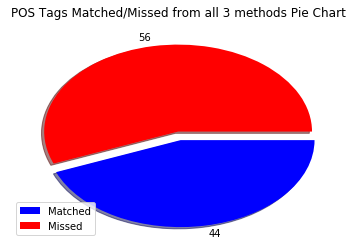

In [28]:
values = [44, (100-44)]
colors = ['b', 'r']
labels = ['Matched', 'Missed']
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('POS Tags Matched/Missed from all 3 methods Pie Chart')
plt.legend(labels,loc=3)

In [21]:
t1_match = matched = set(news_tag_1) & set(manual_news)
print "Percentage matched by manual Tag and NLTK pos.tag: 63%"
t1_match

{(',', ','),
 ('Michael', 'NNP'),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('logs', 'NNS'),
 ('out', 'RP'),
 ('residents', 'NNS'),
 ('some', 'DT'),
 ('spelling', 'VBG'),
 ('with', 'IN')}

In [22]:
t2_match = matched = set(news_tag_2) & set(manual_news)
print "Percentage matched by manual Tag and NLTK Unigram: 50%"
t2_match

{(',', ','),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('logs', 'NNS'),
 ('out', 'RP'),
 ('residents', 'NNS'),
 ('summoned', 'VBD'),
 ('with', 'IN')}

In [23]:
t3_match = matched = set(news_tag_2) & set(news_tag_1)
print "Percentage matched by NLTK pos.tag and the NLTK Unigram: 44%"
t3_match

{(',', ','),
 ('aid', 'NN'),
 ('by', 'IN'),
 ('logs', 'NNS'),
 ('out', 'RP'),
 ('residents', 'NNS'),
 ('with', 'IN')}

([<matplotlib.patches.Wedge at 0x107a6e10>,
 [Text(0.206119,-1.08052,'Matched'), Text(-0.206119,1.08052,'Missed')])

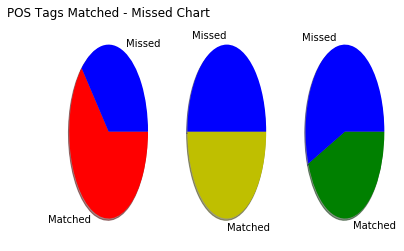

In [26]:
values = [63, (100-63)]
values2 = [50, (100-50)]
values3 = [44, (100-44)]
colors = ['r', 'b']
colors2 = ['y', 'b']
colors3 = ['g', 'b']
labels = ['Matched', 'Missed']

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.set_title('POS Tags Matched - Missed Chart')
ax1.pie(values, colors=colors, labels= labels,counterclock=False, shadow=True)
ax2.pie(values2, colors=colors2, labels= labels,counterclock=False, shadow=True)
ax3.pie(values3, colors=colors3, labels= labels,counterclock=False, shadow=True)

As we can see from the results above the methods used to Tag words from a news article produced different results. 
All of them agree on around 44% of words identified.
The manual Tag and NLTK pos.tag agree on around 63% of words identified.
The manual Tag and NLTK Unigram Tagger agree on 50% of words identified.
Finally, the NLTK pos.tag and the NLTK Unigram Tagger agree on around 44% of words identified.

As stated earlier this is to be expected. Tagging can be a subjective process. All methods used different training samples and rules to differentiate between the various parts of speech, so it comes as no suprise that they arrived to different results.
A thing that must be noted is that the low agreeance percentage between our methods is mainly due to the fact that the NLTK pos.tag and Unigram Tag use a different part of speech tag classification.